### Mohammad amin Roshani - 610396104 - Statical Methods Project

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import wilcoxon
import seaborn as sns
train_df = pd.read_csv('train.csv', sep=',')
test_df = pd.read_csv('test1.csv', sep=',')
test_df = test_df.iloc[: , 1:]

## Preprocessing
#### we have our independent parameters (MSSubclass, MSZoning, ...) in x_train for training and x_test for testing.
#### we have our dependent parameter (SalePrice) in y_train for train and y_test for test.

In [380]:
x_train = train_df.drop('SalePrice',axis=1)
x_test = test_df.drop('SalePrice',axis=1)
y_train = train_df['SalePrice']
y_test = test_df['SalePrice']

#### here we deal with categorical parameters like "MSZoning" and "SaleCondition" and turn them to numerical.
### before


In [381]:
x_train.head()

,Id,MSSubClass,MSZoning,LotArea,SaleCondition
0,1,60,RL,8450,Normal
1,2,20,RL,9600,Normal
2,3,60,RL,11250,Normal
3,4,70,RL,9550,Abnorml
4,5,60,RL,14260,Normal


In [382]:
x_train = pd.get_dummies(x_train, drop_first = True)
x_train = x_train.drop('Id', axis=1)
x_test = pd.get_dummies(x_test, drop_first = True)
x_test = x_test.drop('Id', axis=1)

### after

In [383]:
x_train.head()

,MSSubClass,LotArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,0,0,1,0,0,0,0,1,0
1,20,9600,0,0,1,0,0,0,0,1,0
2,60,11250,0,0,1,0,0,0,0,1,0
3,70,9550,0,0,1,0,0,0,0,0,0
4,60,14260,0,0,1,0,0,0,0,1,0


## Describing data

In [384]:
des_train = pd.concat([x_train, y_train], axis=1)
des_test = pd.concat([x_test, y_test], axis=1)

### describing test data

In [385]:
des_test.describe()

,MSSubClass,LotArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,60.445026,11090.502618,0.031414,0.026178,0.790576,0.146597,0.005236,0.005236,0.015707,0.785340,0.099476,182581.209424
std,44.758838,14298.710888,0.174891,0.160084,0.407967,0.354633,0.072357,0.072357,0.124665,0.411665,0.300087,79571.133711
min,20.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64500.000000
25%,20.000000,7200.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,131750.000000
50%,60.000000,9600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,162500.000000
75%,80.000000,11520.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,210900.000000
max,190.000000,159000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,555000.000000


### describing train data

In [386]:
des_train.describe()

,MSSubClass,LotArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,0.044521,0.010959,0.788356,0.149315,0.002740,0.008219,0.013699,0.820548,0.085616,180921.195890
std,42.300571,9981.264932,0.206319,0.104145,0.408614,0.356521,0.052289,0.090317,0.116277,0.383862,0.279893,79442.502883
min,20.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,7553.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,129975.000000
50%,50.000000,9478.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,163000.000000
75%,70.000000,11601.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,214000.000000
max,190.000000,215245.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


## Processing (Training the model)
#### Here we use Random-forest to train the model. 
### About Random-forest
#### A random forest is an ensemble model that consists of many decision trees. Predictions are made by averaging the predictions of each decision tree. Or, to extend the analogy—much like a forest is a collection of trees, the random forest model is also a collection of decision tree models. This makes random forests a strong modeling technique that’s much more powerful than a single decision tree.Each tree in a random forest is trained on the test data provided.
### Why we use it
#### We need a model that’s robust, meaning its dependence on the noise in the training set is limited. The random forest algorithm is more robust than a single decision tree, as it uses a set of uncorrelated decision trees and also we don't have to deal with overfitting as we do in other models.

In [387]:
RandomForest = RandomForestRegressor()
x = RandomForest.fit(x_train, y_train)

## Evaluation
#### We evaluate our model the root mean squared error between "pred" (our prediction) and (y_test).
#### rmse is 23904.675563704 in my run.

In [388]:
pred = RandomForest.predict(x_test)

In [389]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

25840.18678519524

## Plotting y_test vs pred
#### to show how good them model is.

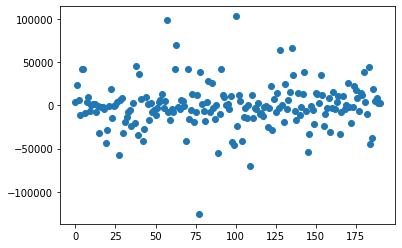

In [390]:
g = plt.plot(y_test - pred,marker='o',linestyle='')

#### This is the result of wilcoxon signed-rank that shows the null hypothesis is not rejected.
#### concluding that there is not a difference in SalePrice between Test data (y_test) and prediction (pred).

In [391]:
x = y_test - pred
w, p = wilcoxon(x)
w, p

(8726.0, 0.5634138269375655)